# EDA



In [ ]:
# For google colab 

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# For google colab 
import sys
sys.path.append('/content/gdrive/MyDrive/Colab Notebooks/loan_prediction')

In [ ]:
import pandas as pd
import seaborn as sns

from loan_prediction.config import split_train
from loan_prediction.custom_funcs import *

In [ ]:
df = pd.read_csv(split_train, index_col='LoanNr_ChkDgt')
label = 'MIS_Status'

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df.describe()

,Zip,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural
count,717733.000000,717733.000000,717733.000000,717733.000000,717633.000000,717733.00000,717733.000000,717733.000000,717733.000000
mean,53843.424372,398731.357524,110.815890,11.395040,1.280255,8.40327,10.780751,2756.751296,0.756929
std,31170.958176,263247.877447,78.897445,73.554447,0.451716,236.30060,236.906138,12765.072159,0.646117
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,27609.000000,235210.000000,60.000000,2.000000,1.000000,0.00000,0.000000,1.000000,0.000000
50%,55413.000000,445310.000000,84.000000,4.000000,1.000000,0.00000,1.000000,1.000000,1.000000
75%,83705.000000,561730.000000,120.000000,10.000000,2.000000,1.00000,4.000000,1.000000,1.000000
max,99999.000000,928120.000000,569.000000,9999.000000,2.000000,8800.00000,9500.000000,99999.000000,2.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 717733 entries, 5893754007 to 2185585006
Data columns (total 26 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Name               717723 non-null  object 
 1   City               717708 non-null  object 
 2   State              717721 non-null  object 
 3   Zip                717733 non-null  int64  
 4   Bank               716506 non-null  object 
 5   BankState          716499 non-null  object 
 6   NAICS              717733 non-null  int64  
 7   ApprovalDate       717733 non-null  object 
 8   ApprovalFY         717733 non-null  object 
 9   Term               717733 non-null  int64  
 10  NoEmp              717733 non-null  int64  
 11  NewExist           717633 non-null  float64
 12  CreateJob          717733 non-null  int64  
 13  RetainedJob        717733 non-null  int64  
 14  FranchiseCode      717733 non-null  int64  
 15  UrbanRural         717733 non-null  in

In [ ]:
df.isnull().sum()

Name                     10
City                     25
State                    12
Zip                       0
Bank                   1227
BankState              1234
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                100
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr              3613
LowDoc                 2064
ChgOffDate           587840
DisbursementDate       1751
DisbursementGross         0
BalanceGross              0
MIS_Status                0
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

In [ ]:
# preprocessing
df = drop_na(df)

In [ ]:
df.isnull().sum()


Name                      0
City                      0
State                     0
Zip                       0
Bank                      0
BankState                 0
NAICS                     0
ApprovalDate              0
ApprovalFY                0
Term                      0
NoEmp                     0
NewExist                  0
CreateJob                 0
RetainedJob               0
FranchiseCode             0
UrbanRural                0
RevLineCr                 0
LowDoc                    0
ChgOffDate           580324
DisbursementDate          0
DisbursementGross         0
BalanceGross              0
MIS_Status                0
ChgOffPrinGr              0
GrAppv                    0
SBA_Appv                  0
dtype: int64

## Name

In [ ]:
df['Name'].isnull().sum()


0

In [ ]:
df['Name']

LoanNr_ChkDgt
5893754007           KUT-N-KLIP LAWN SERVICE
3842804010    AMERICANA VINEYARDS/WINERY,INC
9096044001       WILD WOOD CHAINSAW CARVINGS
2982214007               SQUEAKY DOOR MARKET
2576085006    RAMZI AFIF KHOURY DBA DOLLAR Z
                           ...              
3204824000        THE CORNER ANIMAL HOSPITAL
1497205002                     USAccessories
1333844003                ZADEDA FARMS, INC.
9612943001                  DR. ROB'S GARAGE
2185585006     SANG YUL LEE DBA MEN IN BLACK
Name: Name, Length: 708966, dtype: object

In [ ]:
test = df['Name'].apply(lambda x: str(x)[-4:])
test.value_counts()[:10]


 INC    84375
INC.    82305
 LLC    55047
Inc.    27429
TION    10792
 Inc     7779
PANY     6755
NTER     5580
VICE     4653
CORP     4360
Name: Name, dtype: int64

In [ ]:
most_used_ends = ['INC', 'INC.', 'LLC', 'Inc.', 'TION', 'Inc', 'PANY']
for end in most_used_ends:
    end_filt = df['Name'].str.endswith(end, na=False)
    print(end)
    print(df[end_filt][label].value_counts(normalize=True))



INC
P I F     0.842281
CHGOFF    0.157719
Name: MIS_Status, dtype: float64
INC.
P I F     0.881733
CHGOFF    0.118267
Name: MIS_Status, dtype: float64
LLC
P I F     0.77819
CHGOFF    0.22181
Name: MIS_Status, dtype: float64
Inc.
P I F     0.684531
CHGOFF    0.315469
Name: MIS_Status, dtype: float64
TION
P I F     0.850259
CHGOFF    0.149741
Name: MIS_Status, dtype: float64
Inc
P I F     0.705686
CHGOFF    0.294314
Name: MIS_Status, dtype: float64
PANY
P I F     0.878905
CHGOFF    0.121095
Name: MIS_Status, dtype: float64


In [ ]:
df = get_endings(df)
df[df['name_end'] == 'Other'][label].value_counts(normalize=True)


P I F     0.824697
CHGOFF    0.175303
Name: MIS_Status, dtype: float64

In [ ]:
df['name_end'].value_counts()


Other    430876
INC       86375
INC.      82305
LLC       56643
Inc.      27429
TION      10792
Inc        7791
PANY       6755
Name: name_end, dtype: int64

## City

In [ ]:
df['City'].isnull().sum()

0

In [ ]:
df[df['City'].isnull()]

,name_end,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
LoanNr_ChkDgt,,,,,,,,,,,,,,,,,,,,,,,,,,


In [ ]:
df['City'].nunique()

29575

In [ ]:
city_val_counts = df['City'].value_counts()[:10]
city_val_counts

LOS ANGELES    9188
HOUSTON        8114
NEW YORK       6264
CHICAGO        4802
MIAMI          4444
SAN DIEGO      4232
DALLAS         3992
PHOENIX        3546
LAS VEGAS      3474
BROOKLYN       2970
Name: City, dtype: int64

In [ ]:
top_cities = city_val_counts.index
for city in top_cities:
    print(f'Current city: {city}')
    print(df[df['City'] == city][label].value_counts(normalize=True))

Current city: LOS ANGELES
P I F     0.722573
CHGOFF    0.277427
Name: MIS_Status, dtype: float64
Current city: HOUSTON
P I F     0.785556
CHGOFF    0.214444
Name: MIS_Status, dtype: float64
Current city: NEW YORK
P I F     0.777778
CHGOFF    0.222222
Name: MIS_Status, dtype: float64
Current city: CHICAGO
P I F     0.724698
CHGOFF    0.275302
Name: MIS_Status, dtype: float64
Current city: MIAMI
P I F     0.671242
CHGOFF    0.328758
Name: MIS_Status, dtype: float64
Current city: SAN DIEGO
P I F     0.849716
CHGOFF    0.150284
Name: MIS_Status, dtype: float64
Current city: DALLAS
P I F     0.802104
CHGOFF    0.197896
Name: MIS_Status, dtype: float64
Current city: PHOENIX
P I F     0.812183
CHGOFF    0.187817
Name: MIS_Status, dtype: float64
Current city: LAS VEGAS
P I F     0.748129
CHGOFF    0.251871
Name: MIS_Status, dtype: float64
Current city: BROOKLYN
P I F     0.664983
CHGOFF    0.335017
Name: MIS_Status, dtype: float64


In [ ]:
# preprocessing
df = drop_col(df, 'City')


## State

In [ ]:
basic_cat_col_data(df, 'State', label, show_vals=51)

Null values: 0
Unique: 51
Vals: 
 CA    103482
TX     55378
NY     45599
FL     32489
PA     27557
OH     25748
IL     23318
MA     19800
MN     19346
NJ     19072
WA     18346
GA     17555
WI     16664
MO     16293
CO     16257
MI     16231
UT     14835
AZ     13932
NC     11174
IN     11079
MD     10474
VA     10380
CT      9538
NH      9461
IA      9455
KS      9085
OR      8801
OK      7789
LA      7546
TN      7471
ID      7413
RI      7105
MT      6864
AL      6571
NV      6328
KY      6128
MS      6040
NE      5027
AR      5026
NM      4758
ME      4734
SC      4425
VT      4279
ND      4176
SD      3451
HI      2806
WV      2569
WY      2219
AK      1891
DE      1720
DC      1281
Name: State, dtype: int64
Current category: CA
P I F     0.814567
CHGOFF    0.185433
Name: MIS_Status, dtype: float64
Current category: TX
P I F     0.811297
CHGOFF    0.188703
Name: MIS_Status, dtype: float64
Current category: NY
P I F     0.798175
CHGOFF    0.201825
Name: MIS_Status, dtype: float64
C

In [ ]:
# df = states_to_rate_categories(df, label)


In [ ]:
df[df['State'] == 'u_11'][label].value_counts(normalize=True)

Series([], Name: MIS_Status, dtype: float64)

In [ ]:
val_counts = df['State'].value_counts()
val_counts

CA    103482
TX     55378
NY     45599
FL     32489
PA     27557
OH     25748
IL     23318
MA     19800
MN     19346
NJ     19072
WA     18346
GA     17555
WI     16664
MO     16293
CO     16257
MI     16231
UT     14835
AZ     13932
NC     11174
IN     11079
MD     10474
VA     10380
CT      9538
NH      9461
IA      9455
KS      9085
OR      8801
OK      7789
LA      7546
TN      7471
ID      7413
RI      7105
MT      6864
AL      6571
NV      6328
KY      6128
MS      6040
NE      5027
AR      5026
NM      4758
ME      4734
SC      4425
VT      4279
ND      4176
SD      3451
HI      2806
WV      2569
WY      2219
AK      1891
DE      1720
DC      1281
Name: State, dtype: int64

## Zip

In [ ]:
basic_cat_col_data(df, 'Zip', label, 5)

Null values: 0
Unique: 31654
Vals: 
 10001    749
90015    732
93401    611
90010    583
33166    525
Name: Zip, dtype: int64
Current category: 10001
P I F     0.738318
CHGOFF    0.261682
Name: MIS_Status, dtype: float64
Current category: 90015
P I F     0.692623
CHGOFF    0.307377
Name: MIS_Status, dtype: float64
Current category: 93401
P I F     0.903437
CHGOFF    0.096563
Name: MIS_Status, dtype: float64
Current category: 90010
CHGOFF    0.540309
P I F     0.459691
Name: MIS_Status, dtype: float64
Current category: 33166
P I F     0.695238
CHGOFF    0.304762
Name: MIS_Status, dtype: float64


In [ ]:
df = drop_col(df, 'Zip')

In [ ]:
df

,name_end,State,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
LoanNr_ChkDgt,,,,,,,,,,,,,,,,,,,,,,,,
5893754007,Other,FL,BANK OF AMERICA NATL ASSOC,NC,561730,22-Nov-02,2003,84,1,1.0,0,1,1,1,Y,N,NaN,31-Jan-03,"$10,000.00",$0.00,P I F,$0.00,"$10,000.00","$5,000.00"
3842804010,INC,NY,ALTERNATIVES FCU,NY,312130,18-Jul-00,2000,12,9,1.0,0,0,1,2,N,N,NaN,30-Sep-00,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$45,000.00"
9096044001,Other,IA,BBCN BANK,CA,453998,13-Sep-05,2005,48,1,1.0,0,1,1,1,0,N,3-Nov-08,30-Sep-05,"$10,000.00",$0.00,CHGOFF,"$7,422.00","$10,000.00","$5,000.00"
2982214007,Other,SD,WELLS FARGO BANK NATL ASSOC,SD,445110,2-Jun-99,1999,60,9,1.0,0,0,1,0,0,Y,NaN,30-Sep-99,"$26,000.00",$0.00,P I F,$0.00,"$26,000.00","$20,800.00"
2576085006,Other,CA,CAPITAL ONE NATL ASSOC,VA,452990,17-Jul-07,2007,66,3,1.0,1,3,0,1,N,N,10-Jul-10,31-Aug-07,"$100,000.00",$0.00,CHGOFF,"$86,893.00","$100,000.00","$50,000.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3204824000,Other,NY,UNITY BANK,NJ,541940,27-Sep-99,1999,228,2,2.0,4,2,1,1,0,N,NaN,30-Apr-00,"$500,000.00",$0.00,P I F,$0.00,"$500,000.00","$375,000.00"
1497205002,Other,CA,BANK OF AMERICA NATL ASSOC,NC,422320,13-Oct-05,2006,57,1,2.0,0,1,0,1,T,N,14-Aug-08,31-Mar-06,"$45,450.00",$0.00,CHGOFF,"$44,450.00","$45,000.00","$22,500.00"
1333844003,INC.,NH,GRANITE ST. ECONOMIC DEVEL COR,NH,0,10-Jun-97,1997,240,8,2.0,8,0,1,0,N,N,NaN,11-Mar-98,"$291,000.00",$0.00,P I F,$0.00,"$291,000.00","$291,000.00"


## Bank

In [ ]:
basic_cat_col_data(df, 'Bank', label, 10)


Null values: 0
Unique: 5579
Vals: 
 BANK OF AMERICA NATL ASSOC        69043
WELLS FARGO BANK NATL ASSOC       50210
JPMORGAN CHASE BANK NATL ASSOC    37954
U.S. BANK NATIONAL ASSOCIATION    27853
CITIZENS BANK NATL ASSOC          26727
PNC BANK, NATIONAL ASSOCIATION    21774
BBCN BANK                         18238
CAPITAL ONE NATL ASSOC            17766
MANUFACTURERS & TRADERS TR CO      8912
READYCAP LENDING, LLC              8459
Name: Bank, dtype: int64
Current category: BANK OF AMERICA NATL ASSOC
P I F     0.723245
CHGOFF    0.276755
Name: MIS_Status, dtype: float64
Current category: WELLS FARGO BANK NATL ASSOC
P I F     0.858096
CHGOFF    0.141904
Name: MIS_Status, dtype: float64
Current category: JPMORGAN CHASE BANK NATL ASSOC
P I F     0.721242
CHGOFF    0.278758
Name: MIS_Status, dtype: float64
Current category: U.S. BANK NATIONAL ASSOCIATION
P I F     0.826949
CHGOFF    0.173051
Name: MIS_Status, dtype: float64
Current category: CITIZENS BANK NATL ASSOC
P I F     0.773749
CHGO

In [ ]:
df['Bank'].value_counts()[:10].sum()

286936

In [ ]:
df = drop_col(df, 'Bank')

## BankState


In [ ]:
basic_cat_col_data(df, 'BankState', label, 56)

Null values: 0
Unique: 56
Vals: 
 CA    93247
NC    63161
IL    51949
OH    46278
SD    40366
TX    37761
RI    35066
NY    31405
VA    23041
DE    19555
MN    15883
UT    14992
PA    13525
WI    12257
MO    11730
GA    10918
FL    10884
MA    10883
AL     9620
OR     8941
WA     8431
CO     8364
CT     7817
IA     7811
NJ     7525
KS     7010
MT     6173
IN     6024
SC     5927
MI     5821
OK     5732
MD     5550
NH     5339
AR     4990
MS     4675
TN     4451
NE     4201
ND     4055
LA     3985
VT     3753
NM     3460
NV     3447
KY     3443
ID     3426
DC     3149
AZ     3141
ME     2928
HI     2320
WY     1709
WV     1577
AK     1133
PR      129
GU        5
AN        1
EN        1
VI        1
Name: BankState, dtype: int64
Current category: CA
P I F     0.781687
CHGOFF    0.218313
Name: MIS_Status, dtype: float64
Current category: NC
P I F     0.705229
CHGOFF    0.294771
Name: MIS_Status, dtype: float64
Current category: IL
P I F     0.774702
CHGOFF    0.225298
Name: MIS_Status, dty

In [ ]:
# df = replace_small_states(df)
#
# basic_cat_col_data(df, 'BankState', label, 56)

In [ ]:
df[df['State'] == df['BankState']][label].value_counts(normalize=True)

P I F     0.894745
CHGOFF    0.105255
Name: MIS_Status, dtype: float64

In [ ]:
df[df['State'] != df['BankState']][label].value_counts(normalize=True)


P I F     0.744667
CHGOFF    0.255333
Name: MIS_Status, dtype: float64

In [ ]:
df = tranform_bank_state(df)

In [ ]:
df

,name_end,State,same_state,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
LoanNr_ChkDgt,,,,,,,,,,,,,,,,,,,,,,,
5893754007,Other,FL,False,561730,22-Nov-02,2003,84,1,1.0,0,1,1,1,Y,N,NaN,31-Jan-03,"$10,000.00",$0.00,P I F,$0.00,"$10,000.00","$5,000.00"
3842804010,INC,NY,True,312130,18-Jul-00,2000,12,9,1.0,0,0,1,2,N,N,NaN,30-Sep-00,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$45,000.00"
9096044001,Other,IA,False,453998,13-Sep-05,2005,48,1,1.0,0,1,1,1,0,N,3-Nov-08,30-Sep-05,"$10,000.00",$0.00,CHGOFF,"$7,422.00","$10,000.00","$5,000.00"
2982214007,Other,SD,True,445110,2-Jun-99,1999,60,9,1.0,0,0,1,0,0,Y,NaN,30-Sep-99,"$26,000.00",$0.00,P I F,$0.00,"$26,000.00","$20,800.00"
2576085006,Other,CA,False,452990,17-Jul-07,2007,66,3,1.0,1,3,0,1,N,N,10-Jul-10,31-Aug-07,"$100,000.00",$0.00,CHGOFF,"$86,893.00","$100,000.00","$50,000.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3204824000,Other,NY,False,541940,27-Sep-99,1999,228,2,2.0,4,2,1,1,0,N,NaN,30-Apr-00,"$500,000.00",$0.00,P I F,$0.00,"$500,000.00","$375,000.00"
1497205002,Other,CA,False,422320,13-Oct-05,2006,57,1,2.0,0,1,0,1,T,N,14-Aug-08,31-Mar-06,"$45,450.00",$0.00,CHGOFF,"$44,450.00","$45,000.00","$22,500.00"
1333844003,INC.,NH,True,0,10-Jun-97,1997,240,8,2.0,8,0,1,0,N,N,NaN,11-Mar-98,"$291,000.00",$0.00,P I F,$0.00,"$291,000.00","$291,000.00"


## NAICS

In [ ]:
basic_cat_col_data(df, 'NAICS', label, 10)

Null values: 0
Unique: 1304
Vals: 
 0         158409
722110     22232
722211     15454
811111     11554
621210     11189
624410      8048
812112      7223
561730      7032
621310      6926
812320      6273
Name: NAICS, dtype: int64
Current category: 0
P I F     0.916886
CHGOFF    0.083114
Name: MIS_Status, dtype: float64
Current category: 722110
P I F     0.761965
CHGOFF    0.238035
Name: MIS_Status, dtype: float64
Current category: 722211
P I F     0.747509
CHGOFF    0.252491
Name: MIS_Status, dtype: float64
Current category: 811111
P I F     0.843864
CHGOFF    0.156136
Name: MIS_Status, dtype: float64
Current category: 621210
P I F     0.96005
CHGOFF    0.03995
Name: MIS_Status, dtype: float64
Current category: 624410
P I F     0.877982
CHGOFF    0.122018
Name: MIS_Status, dtype: float64
Current category: 812112
P I F     0.742351
CHGOFF    0.257649
Name: MIS_Status, dtype: float64
Current category: 561730
P I F     0.807594
CHGOFF    0.192406
Name: MIS_Status, dtype: float64
Current

In [ ]:
df = transform_naics_col(df)

In [ ]:
basic_cat_col_data(df, 'NAICS', label, 25)

Null values: 0
Unique: 20
Vals: 
 0        158409
44        67047
81        57331
54        53725
72        53635
23        52507
62        43783
42        38462
45        33607
33        30233
56        25763
48        16053
32        14041
71        11575
53        10812
31         9285
Other      9206
51         8977
52         7474
11         7041
Name: NAICS, dtype: int64
Current category: 0
P I F     0.916886
CHGOFF    0.083114
Name: MIS_Status, dtype: float64
Current category: 44
P I F     0.775426
CHGOFF    0.224574
Name: MIS_Status, dtype: float64
Current category: 81
P I F     0.802271
CHGOFF    0.197729
Name: MIS_Status, dtype: float64
Current category: 54
P I F     0.81033
CHGOFF    0.18967
Name: MIS_Status, dtype: float64
Current category: 72
P I F     0.779211
CHGOFF    0.220789
Name: MIS_Status, dtype: float64
Current category: 23
P I F     0.765307
CHGOFF    0.234693
Name: MIS_Status, dtype: float64
Current category: 62
P I F     0.89754
CHGOFF    0.10246
Name: MIS_Stat

## ApprovalDate

In [ ]:
basic_cat_col_data(df, 'ApprovalDate', label, 10)


Null values: 0
Unique: 9543
Vals: 
 7-Jul-93     910
30-Jan-04    831
8-Jul-93     623
4-Oct-04     511
30-Sep-03    501
30-Jun-05    431
6-Jul-93     427
18-Apr-05    419
21-Jan-05    385
19-Dec-03    384
Name: ApprovalDate, dtype: int64
Current category: 7-Jul-93
P I F     0.976923
CHGOFF    0.023077
Name: MIS_Status, dtype: float64
Current category: 30-Jan-04
P I F     0.807461
CHGOFF    0.192539
Name: MIS_Status, dtype: float64
Current category: 8-Jul-93
P I F     0.990369
CHGOFF    0.009631
Name: MIS_Status, dtype: float64
Current category: 4-Oct-04
P I F     0.798434
CHGOFF    0.201566
Name: MIS_Status, dtype: float64
Current category: 30-Sep-03
P I F     0.846307
CHGOFF    0.153693
Name: MIS_Status, dtype: float64
Current category: 30-Jun-05
P I F     0.698376
CHGOFF    0.301624
Name: MIS_Status, dtype: float64
Current category: 6-Jul-93
P I F     0.985948
CHGOFF    0.014052
Name: MIS_Status, dtype: float64
Current category: 18-Apr-05
P I F     0.701671
CHGOFF    0.298329
Name: 

In [ ]:
df = approval_date_to_datetime(df)

In [ ]:
df[df['ApprovalDate'] > '2010']['ApprovalDate']

LoanNr_ChkDgt
5008795002   2011-12-21
5612875009   2012-12-05
4941095007   2011-11-03
4530705006   2011-02-02
5936685007   2013-02-21
                ...    
4955775000   2011-11-15
5270665004   2012-06-18
4461495010   2010-12-21
4141855001   2010-06-24
3978415006   2010-03-19
Name: ApprovalDate, Length: 25078, dtype: datetime64[ns]

## ApprovalFY

In [ ]:
basic_cat_col_data(df, 'ApprovalFY', label, 10)



Null values: 0
Unique: 94
Vals: 
 2005    33856
2006    32956
2007    31165
2004    29847
2005    27608
2006    27492
2007    26033
2003    25289
2004    24634
2003    20937
Name: ApprovalFY, dtype: int64
Current category: 2005
P I F     0.746603
CHGOFF    0.253397
Name: MIS_Status, dtype: float64
Current category: 2006
P I F     0.647925
CHGOFF    0.352075
Name: MIS_Status, dtype: float64
Current category: 2007
P I F     0.5691
CHGOFF    0.4309
Name: MIS_Status, dtype: float64
Current category: 2004
P I F     0.819111
CHGOFF    0.180889
Name: MIS_Status, dtype: float64
Current category: 2005
P I F     0.749602
CHGOFF    0.250398
Name: MIS_Status, dtype: float64
Current category: 2006
P I F     0.649534
CHGOFF    0.350466
Name: MIS_Status, dtype: float64
Current category: 2007
P I F     0.57308
CHGOFF    0.42692
Name: MIS_Status, dtype: float64
Current category: 2003
P I F     0.851161
CHGOFF    0.148839
Name: MIS_Status, dtype: float64
Current category: 2004
P I F     0.820533
CHGOFF 

In [ ]:
df['ApprovalFY'].value_counts().index

Index([   2005,    2006,    2007,    2004,  '2005',  '2006',  '2007',    2003,
        '2004',  '2003',    2002,    1995,    1996,    2008,    1999,    1997,
          2001,    2000,  '2002',    1998,  '1995',  '1996',  '2008',    1994,
        '1997',  '2000',  '1999',  '2001',  '1998',  '1994',    1993,    1992,
        '1993',    2009,  '1992',    2010,    1991,  '2009',    1990,  '2010',
          1989,  '1991',  '1990',    2011,  '1989',  '2011',    2012,  '2012',
          2013,    1987,    1986,  '2013',    1984,    1985,    1988,  '1987',
        '1986',  '1984',  '1988',    1983,  '1985',  '1983',    1982,    1981,
        '1982',  '1981',    1980,  '1980',    1979,  '1979',    2014,  '2014',
          1978,  '1978',    1977,  '1977',  '1976',    1976,    1974,    1973,
        '1973',    1975,    1972,  '1974', '1976A',  '1971',  '1975',  '1970',
        '1972',    1971,  '1969',    1970,  '1968',    1969],
      dtype='object')

In [ ]:
df = clean_approval_fy_col(df)

In [ ]:
basic_cat_col_data(df, 'ApprovalFY', label, 10)


Null values: 0
Unique: 47
Vals: 
 2005    61464
2006    60448
2007    57198
2004    54481
2003    46226
2002    35360
1995    33409
1996    31989
2008    30834
1997    30056
Name: ApprovalFY, dtype: int64
Current category: 2005
P I F     0.74795
CHGOFF    0.25205
Name: MIS_Status, dtype: float64
Current category: 2006
P I F     0.648657
CHGOFF    0.351343
Name: MIS_Status, dtype: float64
Current category: 2007
P I F     0.570912
CHGOFF    0.429088
Name: MIS_Status, dtype: float64
Current category: 2004
P I F     0.819754
CHGOFF    0.180246
Name: MIS_Status, dtype: float64
Current category: 2003
P I F     0.853329
CHGOFF    0.146671
Name: MIS_Status, dtype: float64
Current category: 2002
P I F     0.881787
CHGOFF    0.118213
Name: MIS_Status, dtype: float64
Current category: 1995
P I F     0.971774
CHGOFF    0.028226
Name: MIS_Status, dtype: float64
Current category: 1996
P I F     0.958861
CHGOFF    0.041139
Name: MIS_Status, dtype: float64
Current category: 2008
P I F     0.59136
CHGO

In [ ]:
df['ApprovalFY'].value_counts()

2005    61464
2006    60448
2007    57198
2004    54481
2003    46226
2002    35360
1995    33409
1996    31989
2008    30834
1997    30056
1999    29917
2000    29764
2001    29673
1998    28649
1994    25089
1993    18522
1992    16579
2009    14671
2010    12832
1991    12394
1990    11689
1989    10385
2011     9371
2012     4498
2013     1877
1987     1768
1986     1657
1984     1562
1985     1517
1988     1488
1983     1291
1982      550
1981      444
1980      335
1979      280
2014      219
1978      185
1977      103
1976       63
1973       34
1974       31
1975       20
1972       19
1971       13
1970        8
1969        3
1968        1
Name: ApprovalFY, dtype: int64

## Term

In [ ]:
basic_cat_col_data(df, 'Term', label, 40)

Null values: 0
Unique: 399
Vals: 
 84     180464
60      70936
240     67941
120     61338
300     35510
180     22179
36      15462
12      13389
48      12285
72       7463
24       5724
96       5535
90       5475
66       4131
87       3987
63       3617
83       3285
108      3140
144      2552
6        2430
59       2417
61       2409
42       2359
288      2309
54       2248
62       2243
64       2136
78       2128
58       2087
55       2001
276      1996
50       1993
82       1988
57       1979
47       1957
40       1953
49       1952
39       1950
56       1949
51       1946
Name: Term, dtype: int64
Current category: 84
P I F     0.991599
CHGOFF    0.008401
Name: MIS_Status, dtype: float64
Current category: 60
P I F     0.972877
CHGOFF    0.027123
Name: MIS_Status, dtype: float64
Current category: 240
P I F     0.997836
CHGOFF    0.002164
Name: MIS_Status, dtype: float64
Current category: 120
P I F     0.987626
CHGOFF    0.012374
Name: MIS_Status, dtype: float64
Current ca

In [ ]:
val_counts = df['Term'].value_counts()

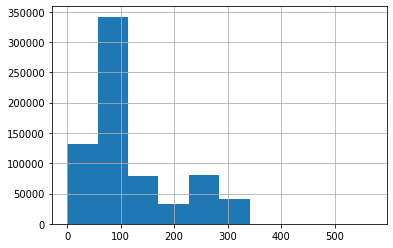

In [ ]:
df['Term'].hist()

In [ ]:
df[df['Term'] > 200][label].value_counts(normalize=True)

P I F     0.971899
CHGOFF    0.028101
Name: MIS_Status, dtype: float64

In [ ]:
df = term_transformer(df)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
pd.set_option('display.max_rows', None)
df['Term'].value_counts().sort_index()

1        1263
2        1417
3        1686
4        1704
5        1485
6        2430
7        1412
8        1358
9        1494
10       1217
11       1361
12      13389
13       1622
14       1208
15       1236
16       1153
17       1175
18       1494
19       1249
20       1300
21       1260
22       1250
23       1484
24       5724
25       1452
26       1398
27       1438
28       1468
29       1386
30       1730
31       1580
32       1509
33       1542
34       1672
35       1809
36      15462
37       1793
38       1837
39       1950
40       1953
41       1859
42       2359
43       1801
44       1781
45       1775
46       1851
47       1957
48      12285
49       1952
50       1993
51       1946
52       1921
53       1906
54       2248
55       2001
56       1949
57       1979
58       2087
59       2417
60      70936
61       2409
62       2243
63       3617
64       2136
65       1940
66       4131
67       1701
68       1680
69       1703
70       1677
71       1794
72    

In [ ]:
df[df['Term'] > 300][label].value_counts(normalize=True)


P I F     0.973328
CHGOFF    0.026672
Name: MIS_Status, dtype: float64

In [ ]:
df[df['Term'] == 84][label].value_counts(normalize=True)


P I F     0.991599
CHGOFF    0.008401
Name: MIS_Status, dtype: float64

In [ ]:
df[(df['Term'] < 120) & (df['Term'] > 84)][label].value_counts(normalize=True)

P I F     0.728233
CHGOFF    0.271767
Name: MIS_Status, dtype: float64

In [ ]:
df[df['Term'] == 250].shape

(89, 23)

## NoEmp

In [ ]:
basic_cat_col_data(df, 'NoEmp')

Null values: 0
Unique: 542
Vals: 
 1     120991
2     108753
3      71485
4      57973
5      47640
6      36217
10     24840
8      24721
7      24703
12     16387
Name: NoEmp, dtype: int64
Current category: 1
P I F     0.771785
CHGOFF    0.228215
Name: MIS_Status, dtype: float64
Current category: 2
P I F     0.793771
CHGOFF    0.206229
Name: MIS_Status, dtype: float64
Current category: 3
P I F     0.794558
CHGOFF    0.205442
Name: MIS_Status, dtype: float64
Current category: 4
P I F     0.805306
CHGOFF    0.194694
Name: MIS_Status, dtype: float64
Current category: 5
P I F     0.809362
CHGOFF    0.190638
Name: MIS_Status, dtype: float64
Current category: 6
P I F     0.822017
CHGOFF    0.177983
Name: MIS_Status, dtype: float64
Current category: 10
P I F     0.852013
CHGOFF    0.147987
Name: MIS_Status, dtype: float64
Current category: 8
P I F     0.84588
CHGOFF    0.15412
Name: MIS_Status, dtype: float64
Current category: 7
P I F     0.833381
CHGOFF    0.166619
Name: MIS_Status, dtype:

In [ ]:
pd.set_option('display.max_rows', None)
df['NoEmp'].value_counts().sort_index()

0         5224
1       120991
2       108753
3        71485
4        57973
5        47640
6        36217
7        24703
8        24721
9        14232
10       24840
11        9338
12       16387
13        7380
14        8439
15       14438
16        6213
17        4927
18        6228
19        3011
20       11267
21        2872
22        4154
23        2773
24        2922
25        7813
26        2173
27        1936
28        2366
29        1202
30        6846
31        1147
32        1824
33        1090
34        1155
35        3956
36        1090
37         859
38        1134
39         602
40        3963
41         546
42        1015
43         697
44         537
45        2315
46         516
47         532
48         682
49         378
50        3238
51         309
52         530
53         351
54         323
55        1119
56         275
57         271
58         311
59         182
60        1937
61         169
62         335
63         237
64         196
65        1028
66        

In [ ]:
df[df['NoEmp'] == 31][label].value_counts(normalize=True)

P I F     0.920663
CHGOFF    0.079337
Name: MIS_Status, dtype: float64

In [ ]:
df[df['NoEmp'] > 100].shape[0]

5817

In [ ]:
df = transform_noemp(df)
df['NoEmp'].value_counts().sort_index()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

0        5224
1      120991
2      108753
3       71485
4       57973
5       47640
6       36217
7       24703
8       24721
9       14232
10      24840
11       9338
12      16387
13       7380
14       8439
15      14438
16       6213
17       4927
18       6228
19       3011
20      11267
21       2872
22       4154
23       2773
24       2922
25       7813
26       2173
27       1936
28       2366
29       1202
30       6846
31       1147
32       1824
33       1090
34       1155
35       3956
36       1090
37        859
38       1134
39        602
40       3963
41        546
42       1015
43        697
44        537
45       2315
46        516
47        532
48        682
49        378
50       3238
51        309
52        530
53        351
54        323
55       1119
56        275
57        271
58        311
59        182
60       1937
61        169
62        335
63        237
64        196
65       1028
66        154
67        180
68        232
69        104
70       1035
71    

## NewExist

In [ ]:
basic_cat_col_data(df, 'NewExist', show_vals=2)

Null values: 0
Unique: 3
Vals: 
 1.0    508489
2.0    199007
Name: NewExist, dtype: int64
Current category: 1.0
P I F     0.828903
CHGOFF    0.171097
Name: MIS_Status, dtype: float64
Current category: 2.0
P I F     0.813087
CHGOFF    0.186913
Name: MIS_Status, dtype: float64


In [ ]:
df['NewExist'].dtype

dtype('float64')

## CreateJob

In [ ]:
basic_cat_col_data(df, 'CreateJob')

Null values: 0
Unique: 228
Vals: 
 0     495371
1      49907
2      45584
3      22774
4      16212
5      14694
10      9106
6       8623
8       5848
7       5082
Name: CreateJob, dtype: int64
Current category: 0
P I F     0.842805
CHGOFF    0.157195
Name: MIS_Status, dtype: float64
Current category: 1
P I F     0.702667
CHGOFF    0.297333
Name: MIS_Status, dtype: float64
Current category: 2
P I F     0.732538
CHGOFF    0.267462
Name: MIS_Status, dtype: float64
Current category: 3
P I F     0.767849
CHGOFF    0.232151
Name: MIS_Status, dtype: float64
Current category: 4
P I F     0.79546
CHGOFF    0.20454
Name: MIS_Status, dtype: float64
Current category: 5
P I F     0.811624
CHGOFF    0.188376
Name: MIS_Status, dtype: float64
Current category: 10
P I F     0.848122
CHGOFF    0.151878
Name: MIS_Status, dtype: float64
Current category: 6
P I F     0.84379
CHGOFF    0.15621
Name: MIS_Status, dtype: float64
Current category: 8
P I F     0.858755
CHGOFF    0.141245
Name: MIS_Status, dtyp

In [ ]:
df['CreateJob'].value_counts().sort_index()

0       495371
1        49907
2        45584
3        22774
4        16212
5        14694
6         8623
7         5082
8         5848
9         2659
10        9106
11        1619
12        3380
13        1420
14        1510
15        4275
16        1155
17         783
18        1142
19         572
20        3497
21         524
22         757
23         475
24         499
25        1840
26         288
27         259
28         363
29         285
30        1602
31         110
32         213
33         151
34         139
35         595
36         110
37         101
38         129
39          71
40         767
41          44
42          69
43          73
44          46
45         225
46          35
47          36
48          69
49          41
50         734
51          21
52          22
53          31
54          24
55         115
56          27
57          23
58          28
59          19
60         227
61          12
62          23
63          15
64          18
65          89
66        

In [ ]:
df[(df['CreateJob'] > 40) & (df['CreateJob'] < 100)][label].value_counts(normalize=True)

P I F     0.917669
CHGOFF    0.082331
Name: MIS_Status, dtype: float64

In [ ]:
df[df['CreateJob'] > 100][label].value_counts(normalize=True)

pd.set_option('display.max_rows', 10)

P I F     0.730208
CHGOFF    0.269792
Name: MIS_Status, dtype: float64

In [104]:
create_jobs_range_list = [(200, df['CreateJob'].max() + 1),
                          (100, 200),
                          (30, 100),
                          (20, 30),
                          (15, 20)]
df = group_values(df, 'CreateJob', create_jobs_range_list)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [105]:
pd.set_option('display.max_rows', None)
df['CreateJob'].value_counts().sort_index()


0      495371
1       49907
2       45584
3       22774
4       16212
5       14694
6        8623
7        5082
8        5848
9        2659
10       9106
11       1619
12       3380
13       1420
14       1510
15       7927
20       8787
30       6648
100       468
200       708
Name: CreateJob, dtype: int64

## RetainedJob